In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### Data Preprocessing:

Load the dataset and inspect its structure.

In [2]:
df = pd.read_csv('gender_classification_v72.csv')

df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


### Convert categorical data (gender) to numerical using Label Encoding.

In [3]:
df['gender'] = LabelEncoder().fit_transform(df['gender'])

In [4]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


### Split the dataset into features (X) and target (y).

In [5]:
y = df['gender']

In [6]:
X = df.drop('gender',axis=1)

In [7]:
y

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int32

In [8]:
X

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.8,6.1,1,0,1,1
1,0,14.0,5.4,0,0,1,0
2,0,11.8,6.3,1,1,1,1
3,0,14.4,6.1,0,1,1,1
4,1,13.5,5.9,0,0,0,0
...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0
4997,1,11.9,5.4,0,0,0,0
4998,1,12.9,5.7,0,0,0,0
4999,1,13.2,6.2,0,0,0,0


### Split the data into training and testing sets (e.g., 80% training, 20% testing).

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=1)

In [11]:
X_train.shape

(4000, 7)

In [12]:
X_test.shape

(1001, 7)

In [13]:
y_train.shape

(4000,)

In [14]:
y_test.shape

(1001,)

### Scale the features using StandardScaler

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train[:5]

array([[ 0.38655567, -0.79194941,  1.212875  ,  1.01106117,  0.97676975,
         1.01969389,  1.00050013],
       [-2.5869495 ,  0.19860645, -0.82331486, -0.98905984, -1.02378273,
        -0.98068647, -0.99950012],
       [ 0.38655567, -1.24220208, -0.08288218,  1.01106117,  0.97676975,
         1.01969389,  1.00050013],
       [ 0.38655567,  1.81951605,  1.7681995 ,  1.01106117,  0.97676975,
         1.01969389,  1.00050013],
       [ 0.38655567,  0.82896018, -0.45309852,  1.01106117,  0.97676975,
         1.01969389,  1.00050013]])

In [18]:
X_test[:5]

array([[ 0.38655567, -0.34169675,  0.65755049, -0.98905984, -1.02378273,
         1.01969389, -0.99950012],
       [ 0.38655567, -0.79194941, -0.26799035,  1.01106117,  0.97676975,
         1.01969389,  1.00050013],
       [ 0.38655567, -1.51235368, -1.00842302, -0.98905984, -1.02378273,
        -0.98068647, -0.99950012],
       [ 0.38655567, -0.79194941,  0.47244232, -0.98905984, -1.02378273,
         1.01969389,  1.00050013],
       [ 0.38655567, -0.88199995, -0.63820669, -0.98905984, -1.02378273,
        -0.98068647, -0.99950012]])

### Artificial Neural Network (ANN):

Implement an ANN using MLPClassifier from scikit-learn.

In [19]:
from sklearn.neural_network import MLPClassifier

In [20]:
ann_grid = MLPClassifier()

### Define a parameter grid for Hyperparameter Optimization (HPO) including the number of hidden layers, neurons, and regularization.

In [21]:
ann_param = {
    'hidden_layer_sizes': [(7,), (64,)],
    'alpha': np.logspace(-4,0,5),
    'random_state' : [42]
}

### Use GridSearchCV to perform HPO on the ANN model.

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
ann_model = GridSearchCV(ann_grid,ann_param, cv=5,scoring='accuracy')                

### Train the ANN model on the training set and evaluate its performance on the testing set.

In [24]:
ann_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'hidden_layer_sizes': [(7,), (64,)],
                         'random_state': [42]},
             scoring='accuracy')

### Print the best parameters and the corresponding accuracy score.

In [25]:
print("Best Estimator for Artificial Neural Network using Grid Search :", ann_model.best_estimator_)
print("Best Parameters for Artificial Neural Network using Grid Search :", ann_model.best_params_)
print("Best Score for Artificial Neural Network using Grid Search :", ann_model.best_score_)

Best Estimator for Artificial Neural Network using Grid Search : MLPClassifier(hidden_layer_sizes=(64,), random_state=42)
Best Parameters for Artificial Neural Network using Grid Search : {'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'random_state': 42}
Best Score for Artificial Neural Network using Grid Search : 0.9717499999999999


In [26]:
from sklearn.metrics import accuracy_score,classification_report

In [27]:
pred_ann = ann_model.predict(X_test)

In [28]:
pred_ann

array([0, 1, 0, ..., 1, 1, 0])

In [29]:
print('Accuracy for Artificial Neural Network :',accuracy_score(y_test, pred_ann))

Accuracy for Artificial Neural Network : 0.975024975024975


In [30]:
print(classification_report(y_test, pred_ann))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       504
           1       0.98      0.97      0.97       497

    accuracy                           0.98      1001
   macro avg       0.98      0.97      0.98      1001
weighted avg       0.98      0.98      0.98      1001



### Plot the learning curves (accuracy and loss) during training.

In [31]:
from sklearn.model_selection import learning_curve

In [32]:
train_sizes,train_scores,test_scores=learning_curve(ann_grid,X_train,y_train,train_sizes=np.linspace(0.01,1,50),scoring="accuracy",n_jobs=-1,cv=5)

In [33]:
train_mean=np.mean(train_scores,axis=1)

In [34]:
test_mean=np.mean(test_scores,axis=1)

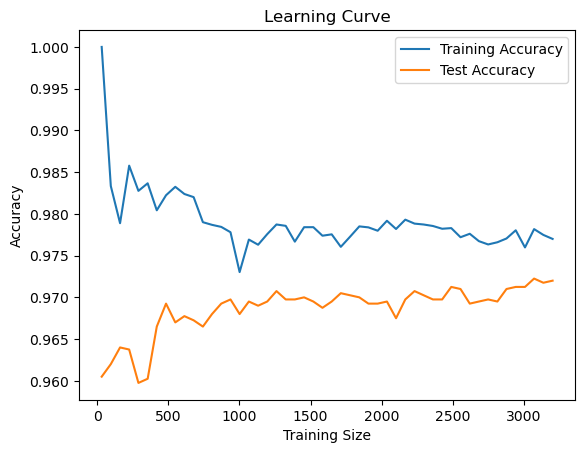

In [35]:
plt.plot(train_sizes,train_mean,label="Training Accuracy")
plt.plot(train_sizes,test_mean,label="Test Accuracy")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Support Vector Classifier (SVC):

Implement an SVC using SVC from scikit-learn with a radial basis function (RBF) kernel.

In [36]:
from sklearn.svm import SVC

In [37]:
svc_grid = SVC()

### Define a parameter grid for HPO including regularization parameters and kernel parameters.
Use GridSearchCV to perform HPO on the SVC model.
Print the best parameters and the corresponding accuracy score.
Train the SVC model on the training set and evaluate its performance on the testing set.

In [38]:
svc_param = {
    'C':np.logspace(-3,2,6),'random_state':[42]
}

### Use GridSearchCV to perform HPO on the SVC model.

In [39]:
svc_model = GridSearchCV(svc_grid, svc_param, cv=5, scoring = 'accuracy')

### Train the SVC model on the training set and evaluate its performance on the testing set.

In [40]:
svc_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'random_state': [42]},
             scoring='accuracy')

### Print the best parameters and the corresponding accuracy score

In [41]:
print("Best Estimator for Support Vector Classifier using Grid Search :", svc_model.best_estimator_)
print("Best Parameters for Support Vector Classifier using Grid Search :", svc_model.best_params_)
print("Best Score for Support Vector Classifier using Grid Search :", svc_model.best_score_)

Best Parameters for Support Vector Classifier using Grid Search : {'C': 1.0, 'random_state': 42}
Best Score for Support Vector Classifier using Grid Search : 0.9730000000000001


In [42]:
pred_svc = svc_model.predict(X_test)

In [43]:
pred_svc

array([0, 1, 0, ..., 1, 1, 0])

In [44]:
print('Accuracy for Support Vector Classifier :',accuracy_score(y_test, pred_svc))

Accuracy for Support Vector Classifier : 0.974025974025974


In [45]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       504
           1       0.99      0.96      0.97       497

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



### Comparison and Analysis:

Compare the performance of the ANN and SVC models.
Analyze the impact of hyperparameter tuning on model accuracy.

In [46]:
print('Accuracy for Artificial Neural Network :',accuracy_score(y_test, pred_ann))
print('Accuracy for Support Vector Classifier :',accuracy_score(y_test, pred_svc))

Accuracy for Artificial Neural Network : 0.975024975024975
Accuracy for Support Vector Classifier : 0.974025974025974


#### After tuning with different hyperparameter combinations, the performance of model improve. This can be note by comparing the final performance metrics with the initial performance metrics.

### Discuss any observations regarding the learning curves of the ANN model.

#### Training Curve:: As the size of the training set increases, you will observe an increase in training accuracy, as larger training sets generally allow the model to learn more complex patterns and generalize better.

#### The training curve may start to plateau after a certain point, indicating that the model has converged and is no longer improving significantly on the training set.

#### Test Curve: Initially, the validation accuracy may increase with the training set size, but it might plateau or even decrease if the model starts overfitting. 
